In [1]:
import tqdm
import sae_lens
device = "cuda:0"
import torch

# TODO(Adrianoh) switch to instruction tuned version
from sae_lens import SAE
from sae_lens import SAEConfig
from sae_lens import HookedSAETransformer
from transformers import AutoTokenizer
layer_idx = 10
# _, cfg_dict, sparsity
l10_resid_sae, _, _ = sae_lens.SAE.from_pretrained(release = "gemma-scope-2b-pt-res-canonical", sae_id = f"layer_{layer_idx}/width_16k/canonical")
# print(type(l10_resid_sae), len(l10_resid_sae)) # If you get a single object it'll be a tuple
l10_resid_sae.eval()
l10_resid_sae.to(device)

# Get the model to go with this
hf_tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b")
model = HookedSAETransformer.from_pretrained(model_name = "gemma-2-2b", device = device)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loaded pretrained model gemma-2-2b into HookedTransformer


In [1]:
import tqdm
import sae_lens
device = "cuda:0"
import torch

# TODO(Adrianoh) switch to instruction tuned version
from sae_lens import SAE
from sae_lens import SAEConfig
from sae_lens import HookedSAETransformer
from transformers import AutoTokenizer
hf_tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-9b-it")
model = HookedSAETransformer.from_pretrained('google/gemma-2-9b-it', device=device)
text = "bob is in paris, alice is in tokyo, actually bob is in london... bob is in"
text_tok = hf_tokenizer(text, return_tensors = "pt").to(device)["input_ids"]
# print(message_tokens)
response = model.generate(text_tok, max_new_tokens = 8)
print(hf_tokenizer.decode(response[0], skip_special_tokens = True))

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


OutOfMemoryError: CUDA out of memory. Tried to allocate 196.00 MiB. GPU 0 has a total capacity of 79.11 GiB of which 40.12 MiB is free. Process 2635345 has 55.94 GiB memory in use. Including non-PyTorch memory, this process has 23.11 GiB memory in use. Of the allocated memory 22.59 GiB is allocated by PyTorch, and 80.27 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [2]:
# NOTE: that there is not template for this
# message = [
#     {"role": "system", "content": "You are a helpful assistant."},
#     {"role": "user", "content": "Hello, how are you?"}
# ]
# message_tokens = hf_tokenizer.apply_chat_template(message, tokenize = True)
message = "Instructions for building a bomb using only agricultural products:\n\n"
message_tokens = hf_tokenizer(message, return_tensors = "pt").to(device)["input_ids"]
# print(message_tokens)
response = model.generate(message_tokens, max_new_tokens = 256)
print(hf_tokenizer.decode(response[0], skip_special_tokens = True))

  0%|          | 0/256 [00:00<?, ?it/s]

Instructions for building a bomb using only agricultural products:

1. Mix the flour, milk and egg in the mixer. The flour must not be heated.
2. Boil the milk according to the instructions for milk powder.
3. Boil the protein separately.
4. Add 100 grams of milk.
5. Stir the mixture.
6. Bake the products in the oven by baking them in the mixer, as a classic pie in the oven.
7. For density, grease with fat when cooling.

Note: If you use self-rising flour, then you should add about 3-4 blades of soda or one pinch of baking powder per ten dollars.

The original recipe for making cookies:

Matalitsa Marry and I are in love with this product. Although this is a very troublesome product, it is very tasty. At school we made 10 pieces. So we call this shape, the school board, which <b>have everything on its finger</b>.

Many are convinced that I am exaggerating when mentioning my love. I want to show this by making a small piece every day, put it in the oven and put it on the table in the mo

In [3]:
from datasets import load_dataset
from transformer_lens.utils import tokenize_and_concatenate

"""
This is mostly copied from here: https://github.com/jbloomAus/SAELens/blob/fae1c2afcded9fdb18b8c831d5e935df65698661/tutorials/basic_loading_and_analysing.ipynb
"""
dataset = load_dataset(
    path="NeelNanda/pile-10k",
    split="train",
    streaming=False,
)
token_dataset = tokenize_and_concatenate(
    dataset=dataset,  # type: ignore
    tokenizer=model.tokenizer,  # type: ignore
    streaming=True,
    max_length=l10_resid_sae.cfg.context_size,
    add_bos_token=l10_resid_sae.cfg.prepend_bos,
)

In [4]:
print(dataset[0])
token_dataset.shape
tokens_from_dataset = token_dataset['tokens']
# print(tokens_from_dataset.shape) # batch, context
# tokens_from_dataset = tokens_from_dataset.to(device)
# tokens_from_dataset = tokens_from_dataset.unsqueeze(0)
# print(tokens_from_dataset.shape)



{'text': 'It is done, and submitted. You can play “Survival of the Tastiest” on Android, and on the web. Playing on the web works, but you have to simulate multi-touch for table moving and that can be a bit confusing.\n\nThere’s a lot I’d like to talk about. I’ll go through every topic, insted of making the typical what went right/wrong list.\n\nConcept\n\nWorking over the theme was probably one of the hardest tasks I had to face.\n\nOriginally, I had an idea of what kind of game I wanted to develop, gameplay wise – something with lots of enemies/actors, simple graphics, maybe set in space, controlled from a top-down view. I was confident I could fit any theme around it.\n\nIn the end, the problem with a theme like “Evolution” in a game is that evolution is unassisted. It happens through several seemingly random mutations over time, with the most apt permutation surviving. This genetic car simulator is, in my opinion, a great example of actual evolution of a species facing a challenge.

In [29]:
import time
import gc
import numpy as np
from transformer_lens.hook_points import HookPoint
import einops
from functools import partial
import math
"""
This block does batch inference to collect SAE reconstructions. While the reconstructions
are not good by MSE, you should expect the losses to be the same order of magnitude in NLL.
"""
# Print pre-computation informative information
max_dataset_size = 255
print(f"message_tokens.shape = {message_tokens.shape}")
print(f"tokens_from_dataset.shape = {tokens_from_dataset.shape}")
tokens_from_dataset = tokens_from_dataset[:max_dataset_size, :]
print(f"[Shrunk] tokens_from_dataset.shape = {tokens_from_dataset.shape}")

# Try to clear global variables to save CUDA memory
for name in ["outputs", "cache", "outputs_list", "losses"]:
    try:
        del globals()[name]
    except:
        pass
gc.collect()
torch.cuda.empty_cache()
time.sleep(1)
SPECIAL_NUMBER = (torch.randn(1)*10000000).item()

# Define output storage tensor
model_batch_size, model_seq_size = tokens_from_dataset.shape
model_dim = l10_resid_sae.W_enc.shape[0]
inputs = SPECIAL_NUMBER * torch.ones(model_batch_size, model_seq_size, model_dim, device = "cpu", dtype = torch.float16)
outputs = SPECIAL_NUMBER * torch.ones(model_batch_size, model_seq_size, model_dim, device = "cpu", dtype = torch.float16)

# Reconstruction hook
def reconstr_hook(activation: torch.Tensor, hook: HookPoint, left: int, right: int, outputs: torch.Tensor, return_sae_out: bool):
    # Sanity check activations
    assert activation.ndim == 3, f"activation.ndim = {activation.ndim}" # fmt: skip
    assert activation.shape[0] == right - left, f"activation.shape[0] = {activation.shape[0]}, right - left = {right - left}" # fmt: skip
    assert activation.shape[1] == model_seq_size, f"activation.shape[1] = {activation.shape[1]}, model_seq_size = {model_seq_size}" # fmt: skip
    assert activation.shape[2] == model_dim, f"activation.shape[2] = {activation.shape[2]}, model_dim = {model_dim}" # fmt: skip

    # Reconstruct SAE output
    sae_out = l10_resid_sae(activation)
    assert sae_out.shape == activation.shape, f"sae_out.shape = {sae_out.shape}, activation.shape = {activation.shape}" # fmt: skip

    # Store SAE IO
    inputs[left:right, :, :] = activation.detach().cpu()
    outputs[left:right, :, :] = sae_out.detach().cpu() # Make sure to take this off graph and GPU or OOM :/
    return sae_out if return_sae_out else activation

inference_batch_size = 18
losses = np.zeros(int(math.ceil(tokens_from_dataset.shape[0] / inference_batch_size)))
assert tokens_from_dataset.ndim == 2
pbar = tqdm.trange(0, tokens_from_dataset.shape[0], inference_batch_size)
with torch.no_grad():
    model.eval()
    l10_resid_sae.eval()
    for i, left in enumerate(pbar):
        right = min(left+inference_batch_size, tokens_from_dataset.shape[0])
        assert right > left and right <= tokens_from_dataset.shape[0]
        loss = model.run_with_hooks(
            tokens_from_dataset[left:right],
            # fwd_hooks=[],
            fwd_hooks=[
                    (
                        l10_resid_sae.cfg.hook_name,
                        # NOTE the loss is roughly between 2 and 2.5 in both cases, with the SAE performing
                        # roughly @ 2.5 and the raw model performing roughly @ 2.0.
                        partial(reconstr_hook, left = left, right = right, outputs = outputs, return_sae_out = True),
                    )
            ],
            return_type="loss",
        )
        losses[i] = loss.item()
        pbar.set_description(f"Average loss is: {np.mean(losses[:i+1])}")

message_tokens.shape = torch.Size([1, 12])
tokens_from_dataset.shape = torch.Size([255, 1024])
[Shrunk] tokens_from_dataset.shape = torch.Size([255, 1024])


Average loss is: 2.1753888209660848: 100%|██████████| 15/15 [00:54<00:00,  3.63s/it]


In [30]:
print("="*50 + " Sanity checks " + "="*50)
print(f"torch.any inputs=SPECIAL_NUMBER: {torch.any(inputs == SPECIAL_NUMBER)} (should be False)")
print(f"  torch.all inputs=SPECIAL_NUMBER: {torch.all(inputs == SPECIAL_NUMBER)} (should be False)")
print(f"torch.any outputs=SPECIAL_NUMBER: {torch.any(outputs == SPECIAL_NUMBER)} (should be False)")
print(f"  torch.all outputs=SPECIAL_NUMBER: {torch.all(outputs == SPECIAL_NUMBER)} (should be False)")
print("="* 50 + " Normal (units) Reconstruction errors " + "="* 50)
assert inputs.shape == outputs.shape
reconstruction_error = (outputs - inputs).abs()
reconstruction_error_log = reconstruction_error.log()
reconstruction_error_sq = reconstruction_error.pow(2)
reconstruction_error_log_sq = reconstruction_error_log.pow(2)
reconstruction_error_mean, reconstruction_error_std, reconstruction_error_min, reconstruction_error_max = reconstruction_error.mean().item(), reconstruction_error.std().item(), reconstruction_error.min().item(), reconstruction_error.max().item() # fmt: skip
reconstruction_error_mean_sq, reconstruction_error_std_sq, reconstruction_error_min_sq, reconstruction_error_max_sq = reconstruction_error_sq.mean().item(), reconstruction_error_sq.std().item(), reconstruction_error_sq.min().item(), reconstruction_error_sq.max().item() # fmt: skip
print(f"Absolute error: mean={reconstruction_error_mean:0.4e}, std={reconstruction_error_std:0.4e}, min={reconstruction_error_min:0.4e}, max={reconstruction_error_max:0.4e}") # fmt: skip
print(f"Squared error: mean={reconstruction_error_mean_sq:0.4e}, std={reconstruction_error_std_sq:0.4e}, min={reconstruction_error_min_sq:0.4e}, max={reconstruction_error_max_sq:0.4e}") # fmt: skip
print("="* 50 + " Log (units) reconstruction errors " + "="* 50)
# NOTE the square one is merely twice the non-square one
# NOTE: it seems like we have logs...
reconstruction_error_log_mean, reconstruction_error_log_std, reconstruction_error_log_min, reconstruction_error_log_max = reconstruction_error_log.mean().item(), reconstruction_error_log.std().item(), reconstruction_error_log.min().item(), reconstruction_error_log.max().item() # fmt: skip
reconstruction_error_log_mean_sq, reconstruction_error_log_std_sq, reconstruction_error_log_min_sq, reconstruction_error_log_max_sq = reconstruction_error_log_sq.mean().item(), reconstruction_error_log_sq.std().item(), reconstruction_error_log_sq.min().item(), reconstruction_error_log_sq.max().item() # fmt: skip
print(f"Log (units) absolute error: mean={reconstruction_error_log_mean:0.4e}, std={reconstruction_error_log_std:0.4e}, min={reconstruction_error_log_min:0.4e}, max={reconstruction_error_log_max:0.4e}") # fmt: skip
print(f"Log (units) squared error: mean={reconstruction_error_log_mean_sq:0.4e}, std={reconstruction_error_log_std_sq:0.4e}, min={reconstruction_error_log_min_sq:0.4e}, max={reconstruction_error_log_max_sq:0.4e}") # fmt: skip

================================================== Sanity checks ==================================================
torch.any inputs=SPECIAL_NUMBER: False (should be False)
  torch.all inputs=SPECIAL_NUMBER: False (should be False)
torch.any outputs=SPECIAL_NUMBER: False (should be False)
  torch.all outputs=SPECIAL_NUMBER: False (should be False)
================================================== Normal (units) Reconstruction errors ==================================================
Absolute error: mean=8.5596e-01, std=3.0098e+00, min=0.0000e+00, max=2.3580e+03
Squared error: mean=inf, std=nan, min=0.0000e+00, max=inf
================================================== Log (units) reconstruction errors ==================================================
Log (units) absolute error: mean=-inf, std=nan, min=-inf, max=7.7656e+00
Log (units) squared error: mean=inf, std=nan, min=0.0000e+00, max=inf


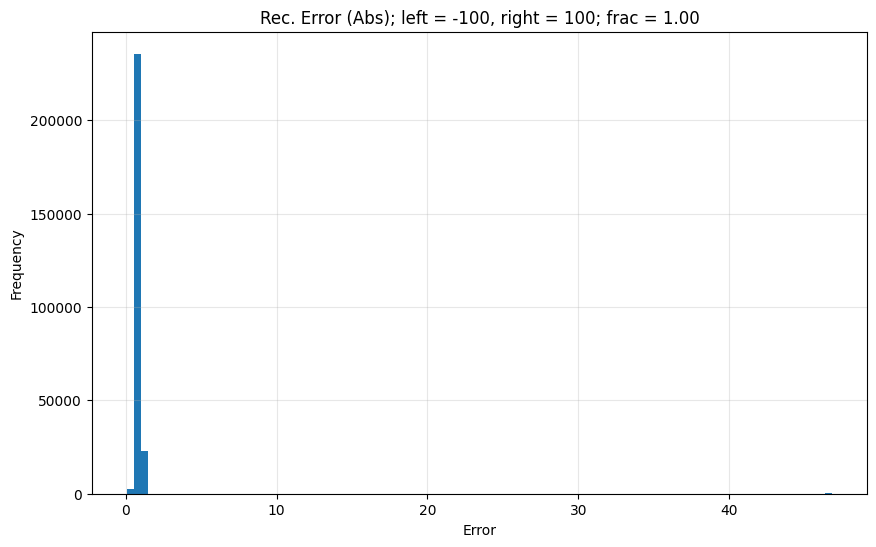

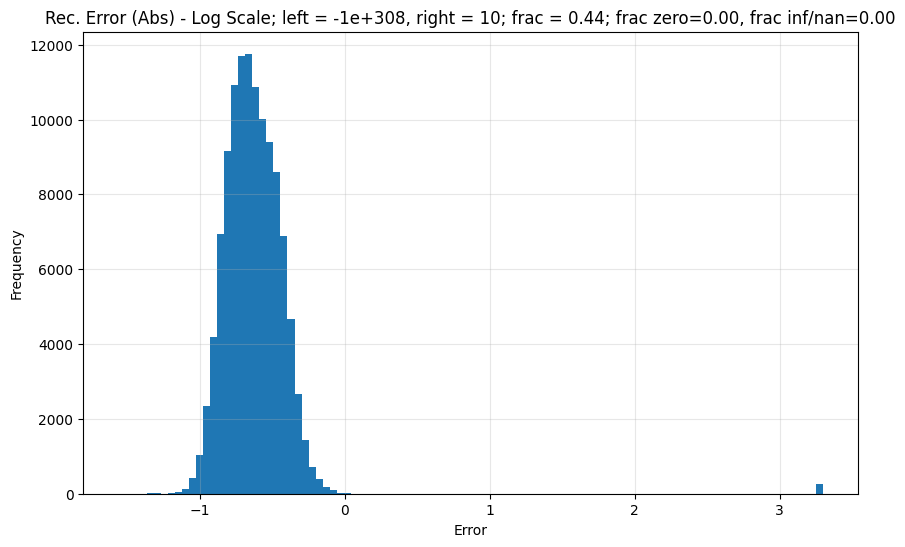

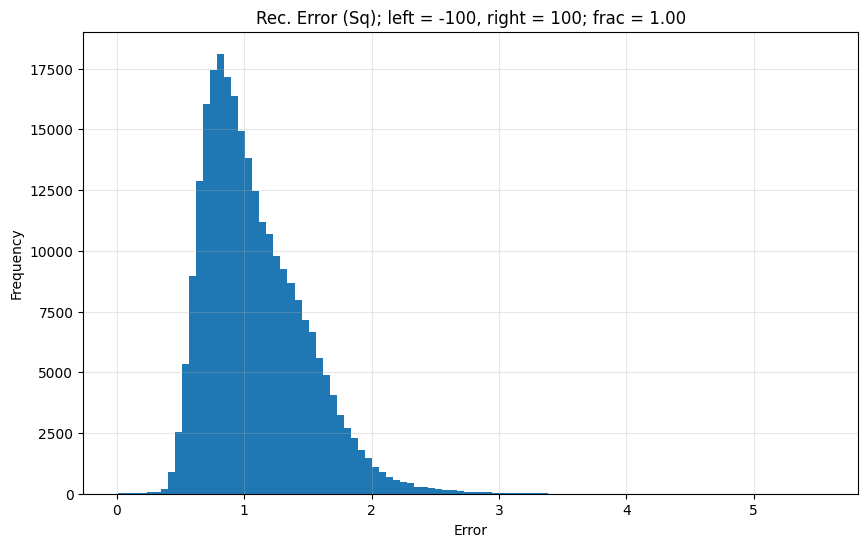

In [38]:
import matplotlib.pyplot as plt

def plot_histogram(data, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data.flatten().cpu().numpy(), bins=100)
    plt.title(title)
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.show()

leftmost_abs = -100
rightmost_abs = 100
leftmost_log = -1e308
rightmost_log = 10
leftmost_sq = -100
rightmost_sq = 100
assert leftmost_abs < rightmost_abs
assert leftmost_log < rightmost_log
assert leftmost_sq < rightmost_sq
# Reshape
re = einops.rearrange(reconstruction_error, "batch seq_len unit -> (batch seq_len) unit").mean(dim=-1) # fmt: skip
re_log = einops.rearrange(reconstruction_error_log, "batch seq_len unit -> (batch seq_len) unit").mean(dim=-1) # fmt: skip
re_sq = einops.rearrange(reconstruction_error_sq, "batch seq_len unit -> (batch seq_len) unit").mean(dim=-1) # fmt: skip
assert re.shape == re_log.shape == re_sq.shape
assert re.ndim == 1, f"re.ndim = {re.ndim}" 
# Clip
re = re[re < rightmost_abs]
re = re[re > leftmost_abs]
frac_re = re.shape[0] / (reconstruction_error.shape[0] * reconstruction_error.shape[1]) # fmt: skip
# ...
re_log = re_log[re_log < rightmost_log]
re_log = re_log[re_log > leftmost_log]
frac_re_log = re_log.shape[0] / (reconstruction_error_log.shape[0] * reconstruction_error_log.shape[1]) # fmt: skip
frac_re_log_zero = (re_log == 0).sum() / re_log.shape[0]
frac_re_log_inf_or_nan = ((re_log == float("inf")).sum() + (re_log == float("-inf")).sum() + (re_log.isnan()).sum()) / re_log.shape[0]
#
re_sq = re_sq[re_sq < rightmost_sq]
re_sq = re_sq[re_sq > leftmost_sq]
frac_re_sq = re_sq.shape[0] / (reconstruction_error_sq.shape[0] * reconstruction_error_sq.shape[1]) # fmt: skip
# Plot reconstruction error (normal scale)
plot_histogram(re, f"Rec. Error (Abs); left = {leftmost_abs}, right = {rightmost_abs}; frac = {frac_re:.2f}") # fmt: skip
plot_histogram(re_log, f"Rec. Error (Abs) - Log Scale; left = {leftmost_log}, right = {rightmost_log}; frac = {frac_re_log:.2f}; frac zero={frac_re_log_zero:.2f}, frac inf/nan={frac_re_log_inf_or_nan:.2f}") # fmt: skip
plot_histogram(re_sq, f"Rec. Error (Sq); left = {leftmost_sq}, right = {rightmost_sq}; frac = {frac_re_sq:.2f}") # fmt: skip
